In [1]:
from pylab import *
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import linalg
from matplotlib import pyplot as plt

In [2]:
def GetkPath(kpoints,numNk):
    numP = len(kpoints)
    Dist = []
    for k in range(numP-1):
        veck = kpoints[k+1]-kpoints[k]
        D    = sqrt( dot(veck,veck) )
        Dist.append( D )
    Dist = array(Dist)
    Nk_p = array( [ int(numNk*D/Dist.sum()) for D in Dist ] )
    if (Nk_p.sum()<numNk):
        Nk_p[-1] = numNk - Nk_p[:-1].sum()
    KX, KY = array([]),array([])
    for k in range(numP-1):
        KX = concatenate([KX,linspace(kpoints[k][0],kpoints[k+1][0],Nk_p[k])]) 
        KY = concatenate([KY,linspace(kpoints[k][1],kpoints[k+1][1],Nk_p[k])])
    return column_stack((KX,KY)),concatenate([[0],cumsum(Nk_p)])

In [3]:
d   = 1.42
t   = 2.97  
b1 = 4*pi/3/d*array([ sqrt(3)/2,0.5])
b2 = 4*pi/3/d*array([-sqrt(3)/2,0.5])
bvec = array([b1,b2])

In [4]:
Γ = dot( array([  0,  0]), bvec )
M = dot( array([1/2,  0]), bvec )
K = dot( array([2/3,1/3]), bvec )

In [5]:
Nkpoints = 1000
K,Kinfo = GetkPath([Γ,K,M,Γ],Nkpoints)
Klabel = [ r"$\Gamma$",r"${\rm K}$",r"${\rm M}$",r"$\Gamma$"]

In [6]:
H0_k   = []
eigva  = []

for kx,ky in K:
    fk = np.sqrt( 4*np.cos(np.sqrt(3)/2*d*kx)*np.cos(3/2*d*ky) + 2*np.cos(np.sqrt(3)*d*kx) + 3 )
    H  = np.array([[ 0             ,  -t*fk ],
                   [np.conj(-t*fk) ,   0    ]])
    H0_k.append(H)
    
for n in H0_k:
    x = linalg.eigvals(n)
    eigva.append(np.sort(x.real))
    
    
eigva = array(eigva)

In [7]:
mpl.rcParams.update({'font.size': 18, 'text.usetex': True})
mpl.rcParams.update({'axes.linewidth':1.5})
mpl.rcParams.update({'axes.labelsize':'large'})
mpl.rcParams.update({'xtick.major.size':6})
mpl.rcParams.update({'xtick.minor.size':4})
mpl.rcParams.update({'ytick.major.size':6})
mpl.rcParams.update({'ytick.minor.size':4})
mpl.rcParams.update({'xtick.major.width':1.5})
mpl.rcParams.update({'xtick.minor.width':1.0})
mpl.rcParams.update({'ytick.major.width':1.5})
mpl.rcParams.update({'ytick.minor.width':1.0})
mpl.rcParams.update({'legend.frameon':False,'legend.framealpha':0.0})

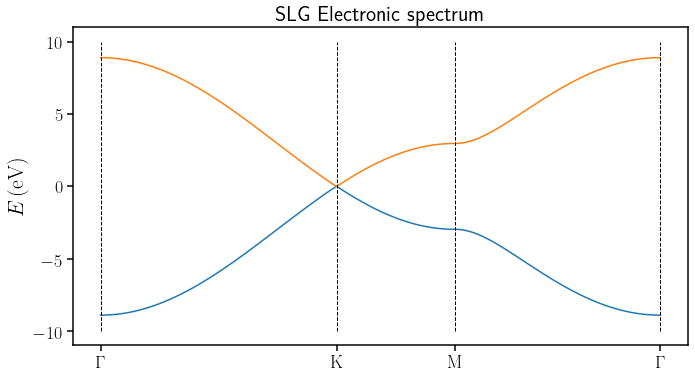

In [8]:
a   = sqrt(3)*d
fig,axes = plt.subplots(ncols=1,nrows=1,figsize=(10,5.6))

axes.plot(arange(Nkpoints),eigva.T[0])
axes.plot(arange(Nkpoints),eigva.T[1])



axes.set_ylabel(r'$E\,({\rm eV})$') 
axes.set_title ('SLG Electronic spectrum')


for kl in Kinfo:
    axes.plot([kl,kl],[-10,10],'--',lw=1,c='k' )

axes.set_xticks(Kinfo)
axes.set_xticklabels(Klabel)

    
fig.tight_layout()
fig.savefig("SLG.png")